In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ml_approach as mla
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [218]:
data = pd.read_spss("ZA7733_sA_v1-0-0.sav", convert_categoricals=False)
data

,study,version,doi,field_start,field_end,sample,lfdn,kp27_2601,kp27_010,kp27_011a,...,kp27_dispcode,kp27_intstatus,kp27_modus,kp27_device,kp27_smartphone,kp27_tablet,kp27_speederindex,kp27_lastpage,kp27_datetime,kp27_date_of_last_access
0,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,4.0,18540.0,5.0,2.0,2.0,...,31.0,1.0,0.0,11.0,0.0,0.0,0.717176,1425.0,2024-09-24 07:22:23,2024-09-24 07:35:18
1,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,3.0,12587.0,9.0,1.0,1.0,...,31.0,1.0,0.0,2.0,1.0,0.0,1.014781,1425.0,2024-09-26 17:09:24,2024-09-26 17:28:53
2,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,6.0,26011.0,9.0,5.0,5.0,...,31.0,1.0,0.0,11.0,0.0,0.0,0.683338,1425.0,2024-09-24 22:16:28,2024-09-24 22:27:38
3,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,6.0,26012.0,9.0,5.0,5.0,...,31.0,1.0,0.0,11.0,0.0,0.0,0.813567,1425.0,2024-09-25 11:50:43,2024-09-25 12:04:48
4,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,6.0,26014.0,7.0,2.0,2.0,...,31.0,1.0,0.0,11.0,0.0,0.0,1.341615,1425.0,2024-09-24 07:49:45,2024-09-24 08:34:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,3.0,2936.0,5.0,2.0,2.0,...,31.0,1.0,0.0,11.0,0.0,0.0,0.623600,1425.0,2024-09-24 19:06:30,2024-09-24 19:19:42
8259,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,3.0,15984.0,5.0,3.0,3.0,...,22.0,3.0,0.0,2.0,1.0,0.0,-93.000000,1941.0,2024-10-03 11:38:18,2024-10-05 15:32:54
8260,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,3.0,6039.0,9.0,3.0,3.0,...,31.0,1.0,0.0,11.0,0.0,0.0,1.014790,1425.0,2024-09-28 09:32:04,2024-09-28 09:49:24
8261,7733.0,"1-0-0 (2024-12-05, Pre-Release)",10.4232/1.14425,2024-09-24,2024-10-08,3.0,15166.0,5.0,2.0,2.0,...,31.0,1.0,0.0,10.0,0.0,0.0,1.435808,1425.0,2024-09-24 19:49:07,2024-09-24 20:31:38


In [219]:
policies = {"wehrpflicht": "kp27_2880cz", "wirtschaft": "kp27_2880g"}
df, count = mla.preprocess_gesis(data, policies.values(), policies.keys())
count

wehrpflicht  wirtschaft
3.0          3.0           1090
4.0          3.0            795
5.0          3.0            662
2.0          3.0            470
3.0          2.0            407
4.0          2.0            403
1.0          3.0            402
4.0          4.0            378
5.0          4.0            360
             2.0            325
             5.0            313
2.0          2.0            306
3.0          4.0            266
1.0          2.0            253
             4.0            203
2.0          4.0            194
1.0          1.0            187
5.0          1.0            182
1.0          5.0            159
3.0          1.0            122
4.0          1.0            122
             5.0            122
3.0          5.0            101
2.0          1.0             84
             5.0             60
Name: count, dtype: int64

In [220]:
model = mla.do_regression(count)

In [221]:
count[(2, 1)]

np.int64(84)

In [222]:
x_min, x_max = count.index.levels[0].min(), count.index.levels[0].max()
y_min, y_max = count.index.levels[1].min(), count.index.levels[1].max()

X = np.arange(x_min, x_max+1)
Y = np.arange(y_min, y_max+1)
Z = count.unstack().values.T.flatten()
Z = Z / Z.sum()

X, Y = np.meshgrid(X, Y)
X, Y = X.flatten(), Y.flatten()
X, Y, Z

(array([1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2.,
        3., 4., 5., 1., 2., 3., 4., 5.]),
 array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 4., 4.,
        4., 4., 4., 5., 5., 5., 5., 5.]),
 array([0.02347477, 0.01054482, 0.01531509, 0.01531509, 0.0228471 ,
        0.03175998, 0.03841326, 0.05109214, 0.05059001, 0.04079839,
        0.05046447, 0.05900075, 0.13683153, 0.09979915, 0.08310319,
        0.0254833 , 0.0243535 , 0.03339192, 0.04745167, 0.04519207,
        0.01995983, 0.00753201, 0.01267889, 0.01531509, 0.03929199]))

In [223]:
poly = PolynomialFeatures(degree=3)
input_pts = np.stack([X, Y]).T
in_features = poly.fit_transform(input_pts)

model = LinearRegression(fit_intercept=False)
model.fit(in_features, Z)

X = np.arange(x_min, x_max+1, 1/100)
print(X)
Y = np.arange(y_min, y_max+1, 1/100)
X, Y = np.meshgrid(X, Y)
X, Y = X.flatten(), Y.flatten()
input_pts = np.stack([X, Y]).T

Z_pred = model.predict(poly.transform(input_pts))


[1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13
 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27
 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41
 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54 1.55
 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69
 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83
 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96 1.97
 1.98 1.99 2.   2.01 2.02 2.03 2.04 2.05 2.06 2.07 2.08 2.09 2.1  2.11
 2.12 2.13 2.14 2.15 2.16 2.17 2.18 2.19 2.2  2.21 2.22 2.23 2.24 2.25
 2.26 2.27 2.28 2.29 2.3  2.31 2.32 2.33 2.34 2.35 2.36 2.37 2.38 2.39
 2.4  2.41 2.42 2.43 2.44 2.45 2.46 2.47 2.48 2.49 2.5  2.51 2.52 2.53
 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63 2.64 2.65 2.66 2.67
 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75 2.76 2.77 2.78 2.79 2.8  2.81
 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9  2.91 2.92 2.93 2.94 2.95
 2.96 

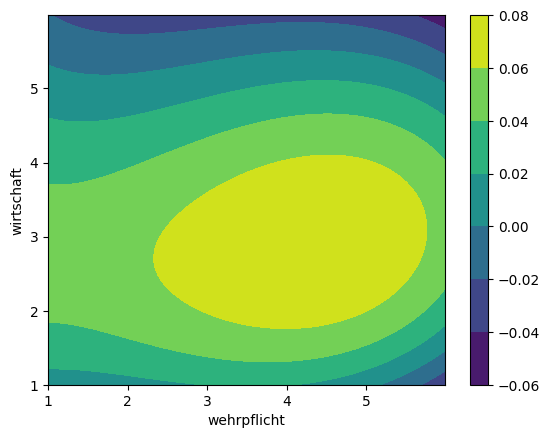

In [224]:
X = np.arange(x_min, x_max+1, 1/100)
Y = np.arange(y_min, y_max+1, 1/100)
X, Y = np.meshgrid(X, Y)
fig, ax = plt.subplots()
cont = ax.contourf(X, Y, Z_pred.reshape(X.shape))
fig.colorbar(cont)
x_label, y_label = list(policies)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

plt.show()

In [225]:
X

array([[1.  , 1.01, 1.02, ..., 5.97, 5.98, 5.99],
       [1.  , 1.01, 1.02, ..., 5.97, 5.98, 5.99],
       [1.  , 1.01, 1.02, ..., 5.97, 5.98, 5.99],
       ...,
       [1.  , 1.01, 1.02, ..., 5.97, 5.98, 5.99],
       [1.  , 1.01, 1.02, ..., 5.97, 5.98, 5.99],
       [1.  , 1.01, 1.02, ..., 5.97, 5.98, 5.99]], shape=(500, 500))

In [226]:
.T
# Z = Z / Z.sum()

SyntaxError: invalid syntax (822237199.py, line 1)

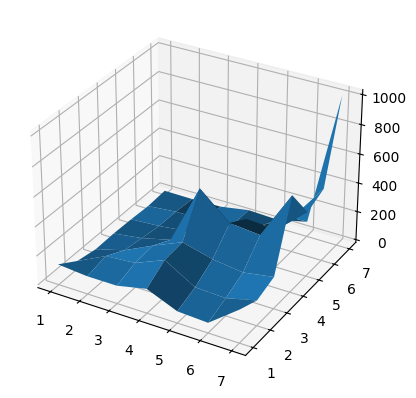

In [ ]:
ax = plt.figure().add_subplot(projection="3d")
surf = ax.plot_surface(X, Y, Z)

plt.show()

<Axes: ylabel='Frequency'>

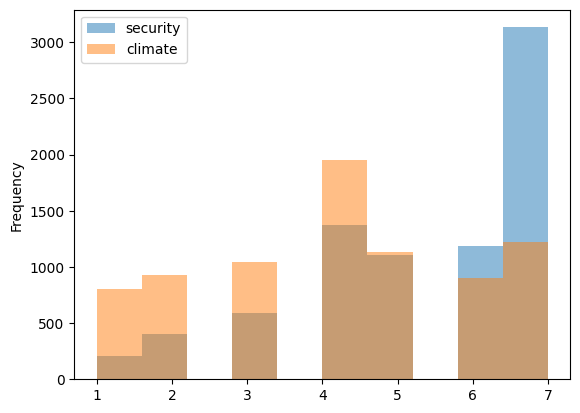

In [ ]:
df.plot.hist(alpha=0.5)